In [2]:
import pandas as pd
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import swifter

Import Dataset CSV with Pandas

In [3]:
df = pd.read_csv("Dataset\dataset_siap.csv")
# print(df)

Lower Case with Pandas

In [4]:
df = df.astype(str).apply(lambda x: x.str.lower())

Remove Puncutuation

In [5]:
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

df['Kalimat']= df['Kalimat'].apply(clean_punct)


Tekonize with NLTK

In [6]:
df['Kalimat'] = df.apply(lambda row: nltk.word_tokenize(row['Kalimat']), axis=1)

Stopwords with NLTK

In [7]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['Kalimat'] = df['Kalimat'].apply(stopwords_removal)

Stemming with Sastrawi

In [8]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}

for document in df['Kalimat']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)


In [9]:
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['Stemming'] = df['Kalimat'].swifter.apply(get_stemmed_term)

Pandas Apply: 100%|██████████| 330/330 [00:00<00:00, 82427.37it/s]


In [12]:
df['Lowers'] = [" ".join(review) for review in df['Stemming'].values]

TF-IDF

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer_tfidf.fit_transform(df['Lowers'])
# print(vectorizer_tfidf.get_feature_names())
print(X_tfidf)

  (0, 328)	0.3381222062724769
  (0, 347)	0.5159529407389651
  (0, 127)	0.5362948354993536
  (0, 171)	0.525699606551505
  (0, 360)	0.23557102889905696
  (1, 328)	0.3381222062724769
  (1, 347)	0.5159529407389651
  (1, 127)	0.5362948354993536
  (1, 171)	0.525699606551505
  (1, 360)	0.23557102889905696
  (2, 328)	0.3381222062724769
  (2, 347)	0.5159529407389651
  (2, 127)	0.5362948354993536
  (2, 171)	0.525699606551505
  (2, 360)	0.23557102889905696
  (3, 328)	0.3381222062724769
  (3, 347)	0.5159529407389651
  (3, 127)	0.5362948354993536
  (3, 171)	0.525699606551505
  (3, 360)	0.23557102889905696
  (4, 328)	0.3381222062724769
  (4, 347)	0.5159529407389651
  (4, 127)	0.5362948354993536
  (4, 171)	0.525699606551505
  (4, 360)	0.23557102889905696
  :	:
  (321, 152)	0.6636779885447268
  (321, 145)	0.5130711148538631
  (321, 167)	0.5443248649692934
  (322, 393)	0.6740334051030099
  (322, 379)	0.6292964078651652
  (322, 396)	0.38686560955096727
  (323, 170)	0.7309478501731659
  (323, 321)	0.6824

In [107]:
Y_test = vectorizer_tfidf.transform(["tampilkan nim mahasiswa nilai d"])
print (Y_test)

  (0, 251)	0.640348408201308
  (0, 250)	0.5431178123179403
  (0, 214)	0.5431178123179403


In [89]:
tfidf = pd.DataFrame(X_tfidf.todense().T, 
index=vectorizer_tfidf.get_feature_names(),
columns=[f'D{i+1}' for i in range(len(df['Lowers']))])

In [97]:
tfidf

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D321,D322,D323,D324,D325,D326,D327,D328,D329,D330
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20192020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
website,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xxx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
you,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
youtube,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df['TFIDF_Skitlearn'] = X_tfidf

In [ ]:
df

In [55]:
df.to_csv("Text_Preprocessing.csv")

In [36]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [52]:
from collections import Counter
# join_text = " ".join(data_training.text)
text_id = " ".join(df[df['Kelas']!="ood"]['Lowers'].values)
text_ood = " ".join(df[df['Kelas']=="ood"]['Lowers'].values)
# counter_obj = Counter(join_text.split(" "))
# counter_obj.most_common(50)
# print (join_text)

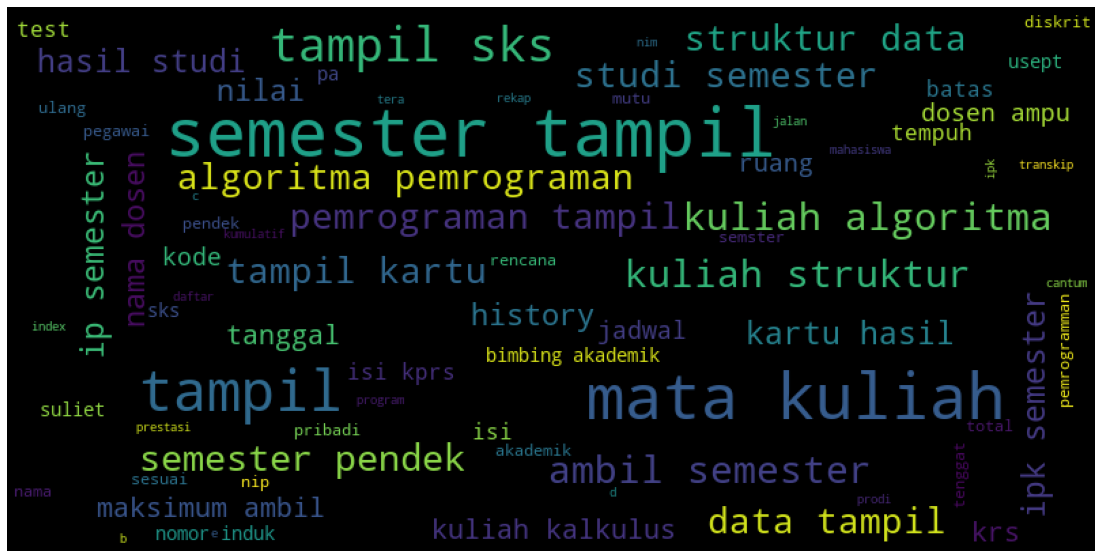

In [53]:
# Create and generate a word cloud image:
wordcloud_id = WordCloud(max_font_size=50, background_color="black", width=800, height=400).generate(text_id)
wordcloud_ood = WordCloud(max_font_size=50, background_color="black", width=800, height=400).generate(text_ood)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_id)
plt.axis("off")
plt.show()

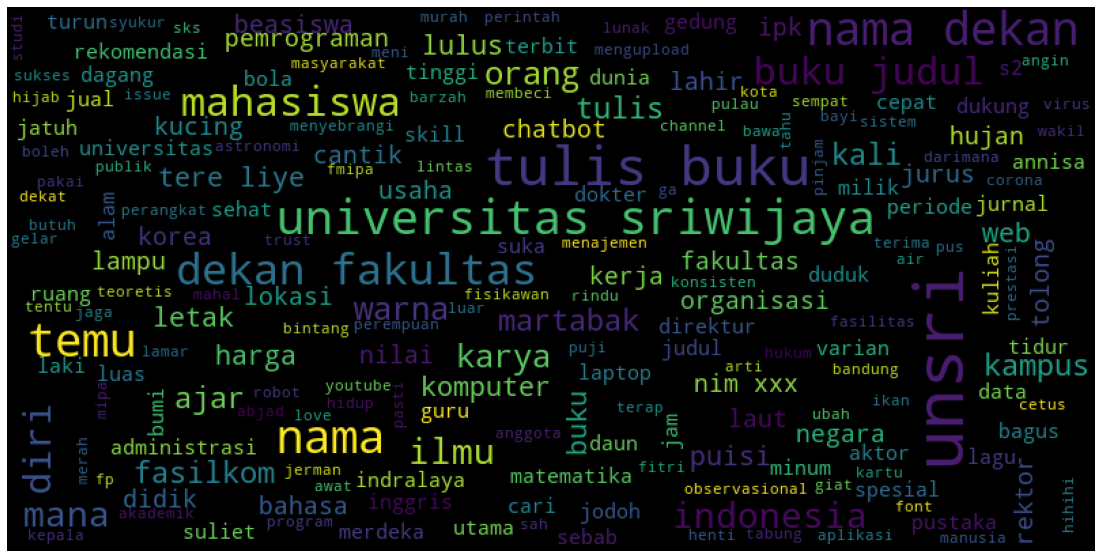

In [54]:
# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_ood)
plt.axis("off")
plt.show()

KLASIFIKASI

In [248]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=500)

In [255]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [282]:
y=df.Kelas
X= vectorizer_tfidf.transform(df.Lowers)

Cross Validation

In [301]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10,)
print(scores)

[1.         1.         1.         1.         1.         1.
 0.84848485 0.93939394 0.96969697 1.        ]
